In [ ]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.metrics import *
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import *
from sklearn.tree import DecisionTreeClassifier

In [ ]:
df = pd.read_csv("heart.csv")

In [ ]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

<AxesSubplot:xlabel='trtbps', ylabel='chol'>

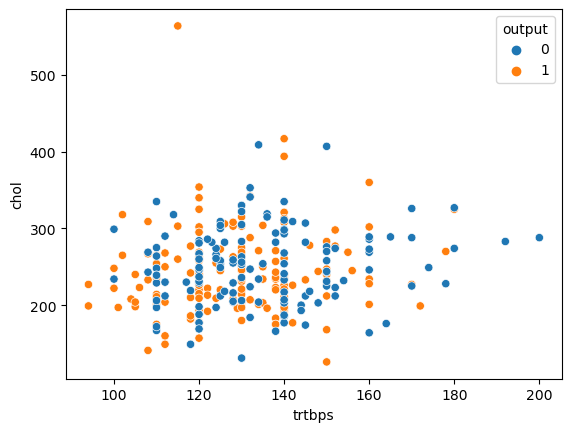

In [ ]:
sns.scatterplot(data = df, x = "trtbps", y = "chol", hue = "output")

In [ ]:
discrete_features = ["sex", "cp", "fbs", "restecg", "exng", "slp", "caa", "thall"]
continuous_features = list(set(df.columns) - set(discrete_features) - {"output"})

<AxesSubplot:>

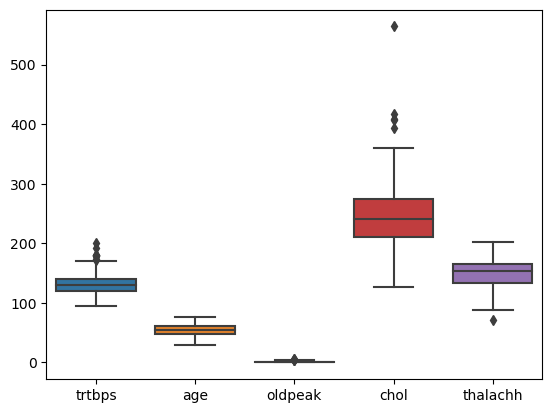

In [ ]:
sns.boxplot(data = df[continuous_features])

<AxesSubplot:xlabel='cp', ylabel='trtbps'>

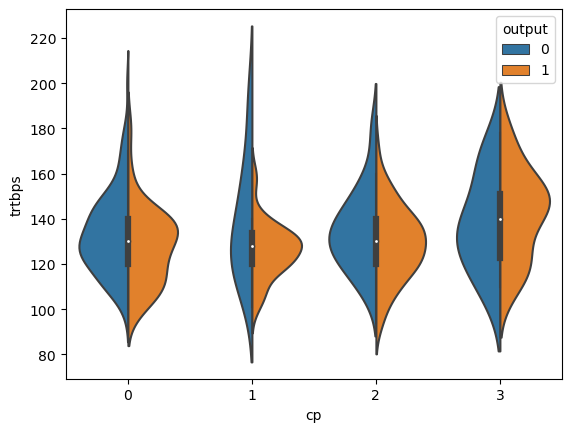

In [ ]:
sns.violinplot(data = df, x = "cp", y = "trtbps", hue = "output", split = True)

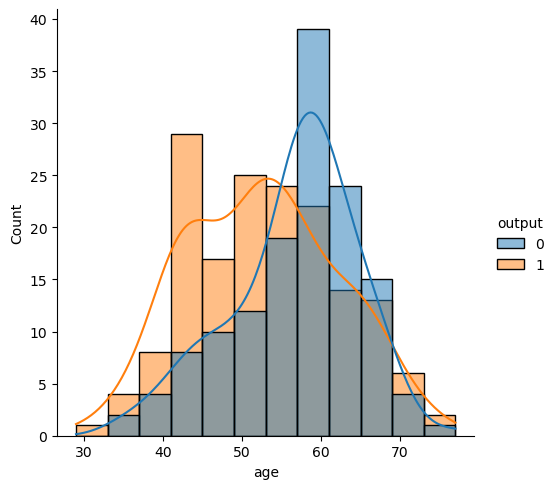

In [ ]:
sns.displot(data = df, x = "age", hue = "output", kde = True)

<AxesSubplot:xlabel='output', ylabel='chol'>

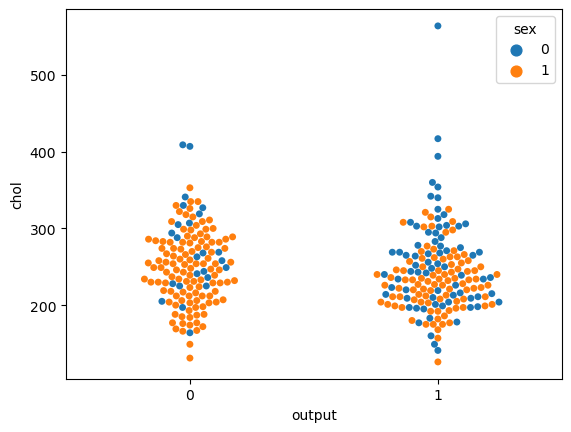

In [ ]:
sns.swarmplot(data = df, x = "output", y = "chol", hue = "sex")

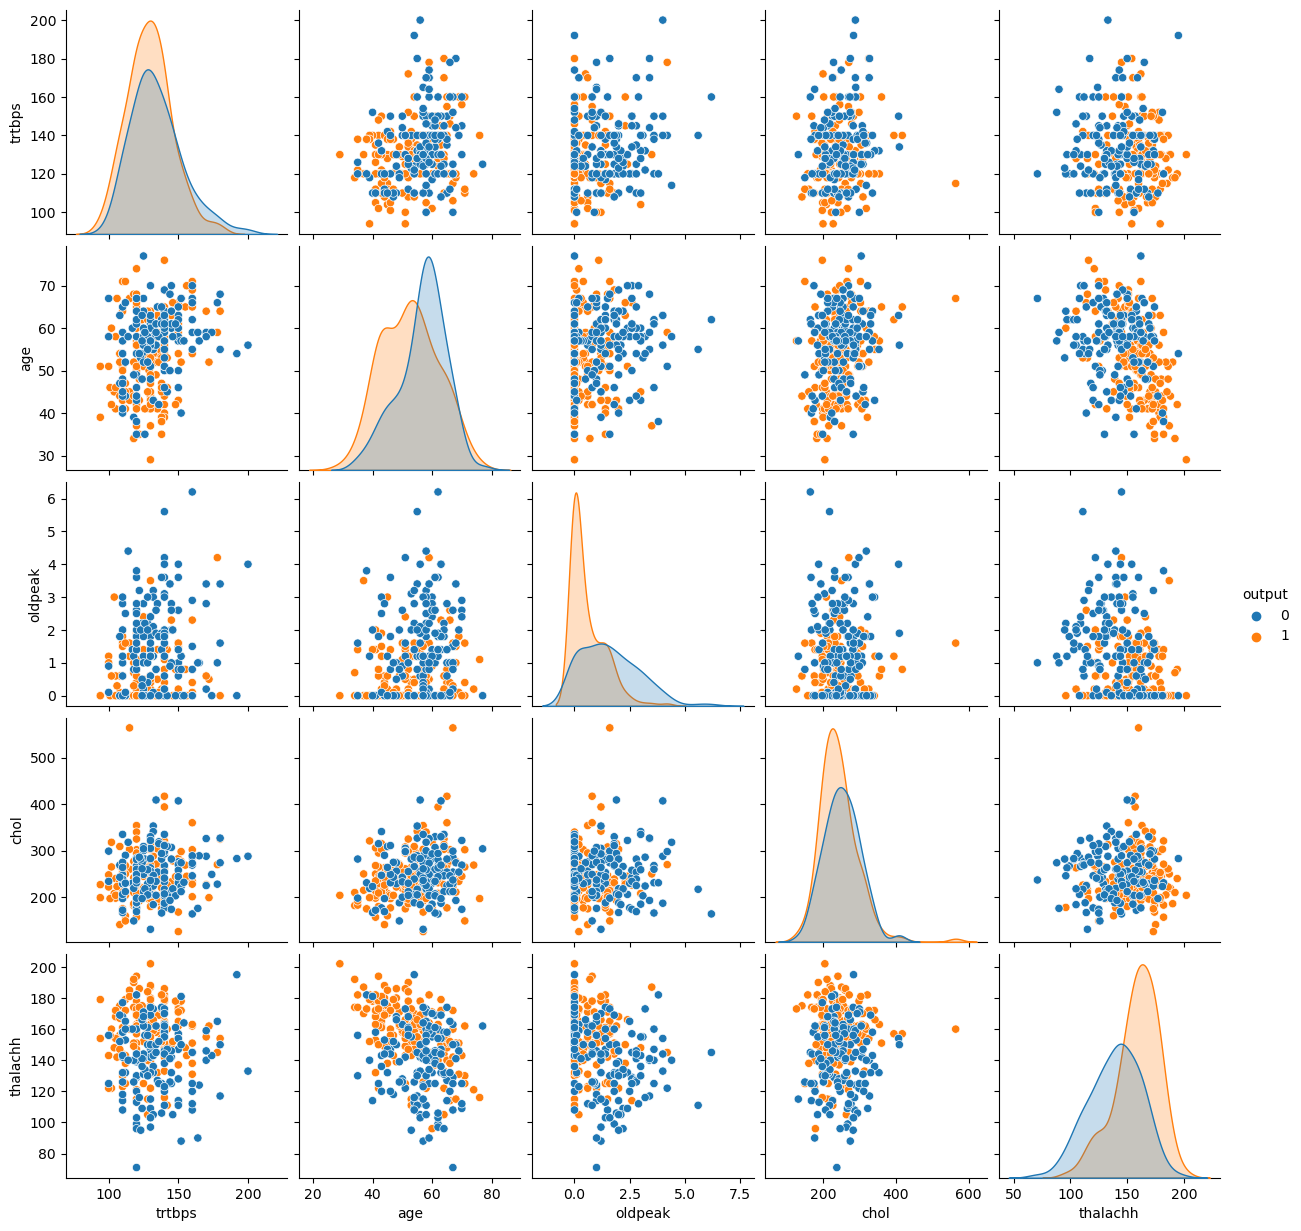

In [ ]:
sns.pairplot(data = df[continuous_features + ["output"]], hue = "output")


<AxesSubplot:>

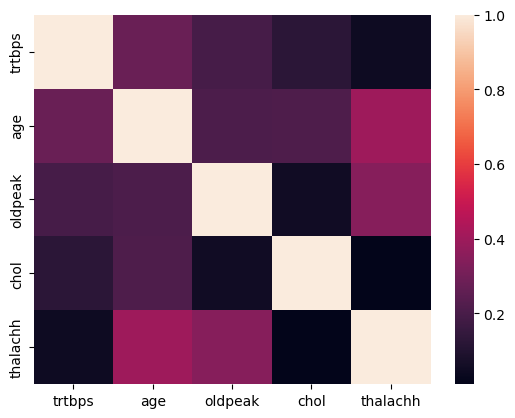

In [ ]:
sns.heatmap(abs(df[continuous_features].corr()))

In [ ]:
y = df["output"]
X = df.drop(["output"], axis = 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
model = LogisticRegression(solver = "liblinear")
model.fit(X_train, y_train)
y_hat = model.predict(X_test)
accuracy_score(y_test, y_hat)

0.8688524590163934

In [ ]:
cross_val_score(model, X, y, cv = 100).mean()

0.8308333333333334

In [ ]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_hat = model.predict(X_test)
accuracy_score(y_test, y_hat)

0.819672131147541

In [ ]:
cross_val_score(model, X, y, cv = 100).mean()


0.7783333333333334